In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [142]:
# Load CSV file into a DataFrame
df = pd.read_csv('data/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [143]:
df.drop('Name', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [145]:
df.isna().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [146]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


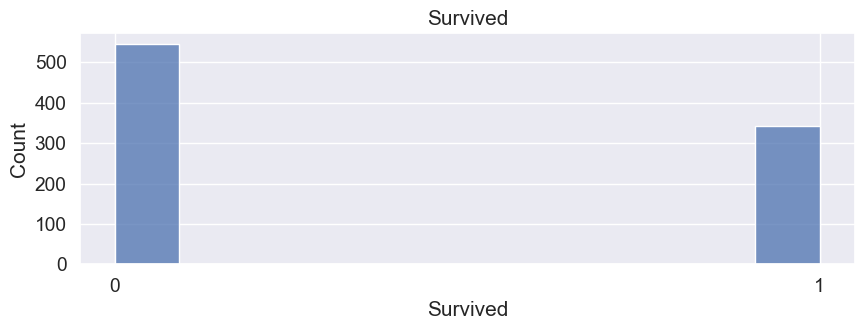

In [147]:
plt.figure(figsize=(10, 3))
sns.histplot(df['Survived'], kde=False)
plt.title('Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])
plt.show()

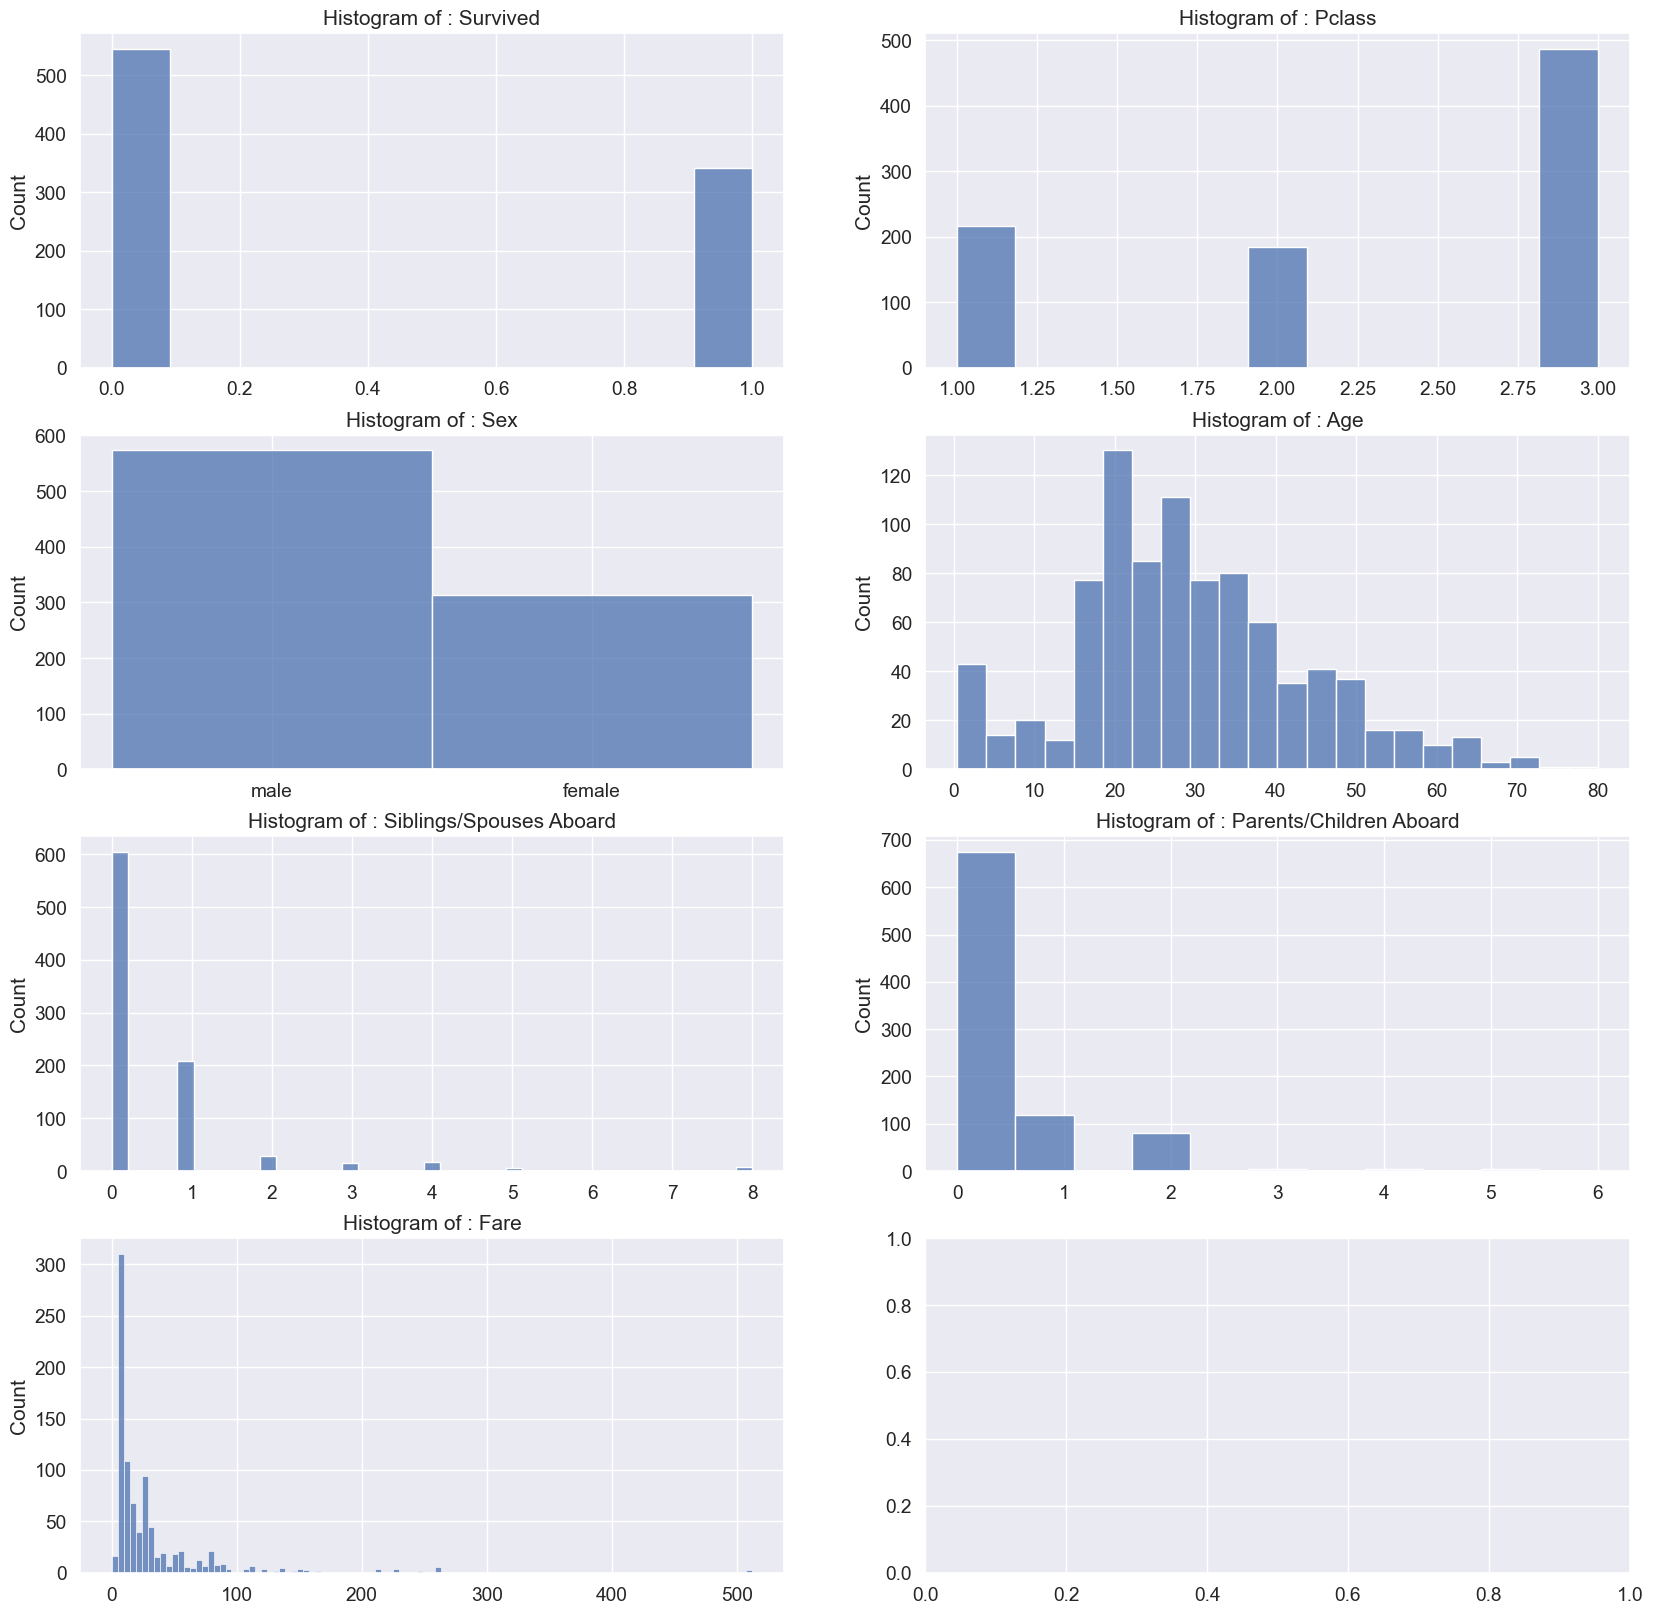

In [148]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
for i, ax in zip(df.columns, axes.flat):
    sns.histplot(x=df[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.show()

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [150]:
# Assuming df is your DataFrame
df_without_sex = df.drop('Sex', axis=1)  # Drop the 'Sex' column

# Calculate the correlation matrix using Spearman method
corr = df_without_sex.corr(method='spearman')

# Display the correlation matrix
print(corr)


                         Survived    Pclass       Age  \
Survived                 1.000000 -0.337648 -0.030265   
Pclass                  -0.337648  1.000000 -0.387982   
Age                     -0.030265 -0.387982  1.000000   
Siblings/Spouses Aboard  0.086571 -0.040348 -0.199269   
Parents/Children Aboard  0.136530 -0.020617 -0.254234   
Fare                     0.322264 -0.688234  0.156062   

                         Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived                                0.086571                 0.136530   
Pclass                                 -0.040348                -0.020617   
Age                                    -0.199269                -0.254234   
Siblings/Spouses Aboard                 1.000000                 0.449198   
Parents/Children Aboard                 0.449198                 1.000000   
Fare                                    0.445980                 0.409202   

                             Fare  
Survived                

In [151]:
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display train and test data
df_train, df_test, y_train, y_test = train_test_split(df, df['Survived'], test_size=0.2, random_state=42)

print("\nTRAIN:")
display(df_train.head())
print("SHAPE:", df_train.shape)

print("\nTEST:")
display(df_test.head())
print("SHAPE:", df_test.shape)


TRAIN:


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
730,0,2,male,23.0,0,0,13.000
390,0,3,male,28.0,2,0,7.925
118,0,3,female,2.0,4,2,31.275
440,1,2,female,28.0,0,0,13.000
309,1,1,female,18.0,2,2,262.375


SHAPE: (709, 7)

TEST:


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
296,1,1,male,47.0,0,0,30.5000
682,0,2,male,25.0,1,2,41.5792
535,0,3,male,69.0,0,0,14.5000
644,1,1,male,56.0,0,0,35.5000
623,0,2,male,57.0,0,0,12.3500


SHAPE: (178, 7)


In [152]:
df_train.info()
df_train.isna().sum()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 730 to 102
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 709 non-null    int64  
 1   Pclass                   709 non-null    int64  
 2   Sex                      709 non-null    object 
 3   Age                      709 non-null    float64
 4   Siblings/Spouses Aboard  709 non-null    int64  
 5   Parents/Children Aboard  709 non-null    int64  
 6   Fare                     709 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.3+ KB


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,0.387870,2.315938,29.326643,0.538787,0.385049,33.547302
std,0.487609,0.834657,14.100166,1.146219,0.811187,52.912893
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.500000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


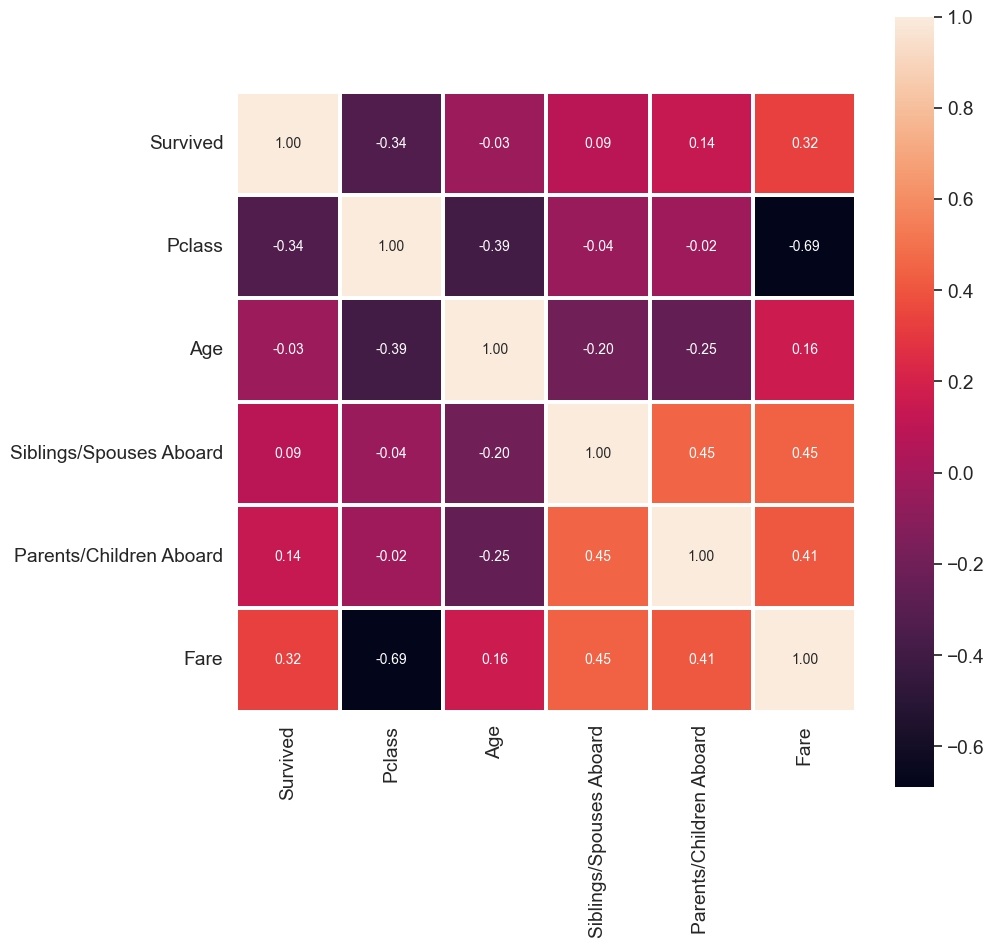

In [153]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}
)
plt.show()

In [154]:
df_train.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
730,0,2,male,23.0,0,0,13.000
390,0,3,male,28.0,2,0,7.925
118,0,3,female,2.0,4,2,31.275
440,1,2,female,28.0,0,0,13.000
309,1,1,female,18.0,2,2,262.375


In [155]:
y = df_train["Survived"].values
print(y.shape)

(709,)


In [156]:
y = df_train["Survived"].values

In [157]:
print(y.shape)

(709,)


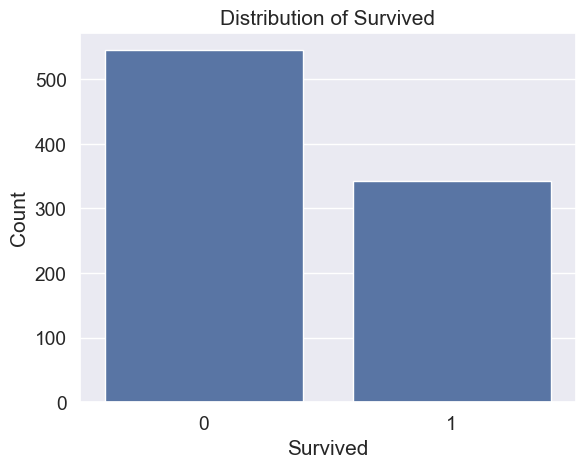

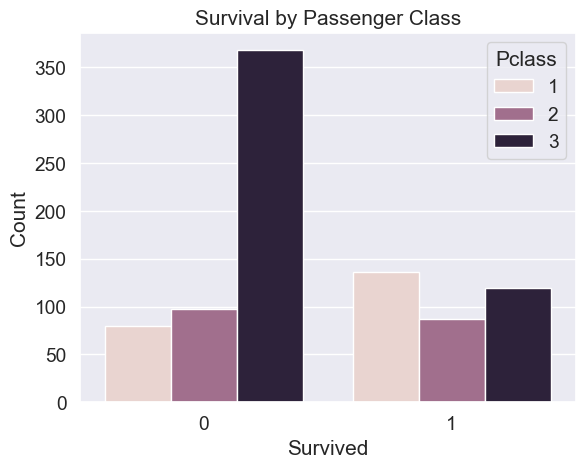

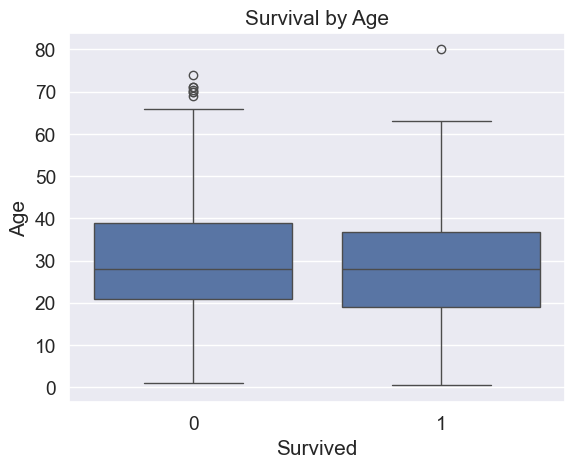

In [158]:
# Visualize the distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived')
plt.show()

# Explore relationships between features and the target variable
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Passenger Class')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Survival by Age')
plt.show()

In [159]:
from scipy.stats import chi2_contingency

# Chi-squared test for Sex vs. Survived
sex_survived_contingency = pd.crosstab(df['Sex'], df['Survived'])
chi2_stat, p_val, dof, expected = chi2_contingency(sex_survived_contingency)
print("Chi-squared p-value for Sex vs. Survived:", p_val)

# Chi-squared test for Pclass vs. Survived
pclass_survived_contingency = pd.crosstab(df['Pclass'], df['Survived'])
chi2_stat, p_val, dof, expected = chi2_contingency(pclass_survived_contingency)
print("Chi-squared p-value for Pclass vs. Survived:", p_val)


Chi-squared p-value for Sex vs. Survived: 3.847574039733745e-58
Chi-squared p-value for Pclass vs. Survived: 1.0496962042983217e-22


In [160]:
from scipy.stats import f_oneway

# Conduct ANOVA for Age and Pclass
anova_results = f_oneway(
    df_train[df_train['Pclass'] == 1]['Survived'].dropna(),
    df_train[df_train['Pclass'] == 2]['Survived'].dropna(),
    df_train[df_train['Pclass'] == 3]['Survived'].dropna()
)

print("ANOVA p-value for Survival and Pclass:", anova_results.pvalue)


ANOVA p-value for Survival and Pclass: 4.799285922174748e-21


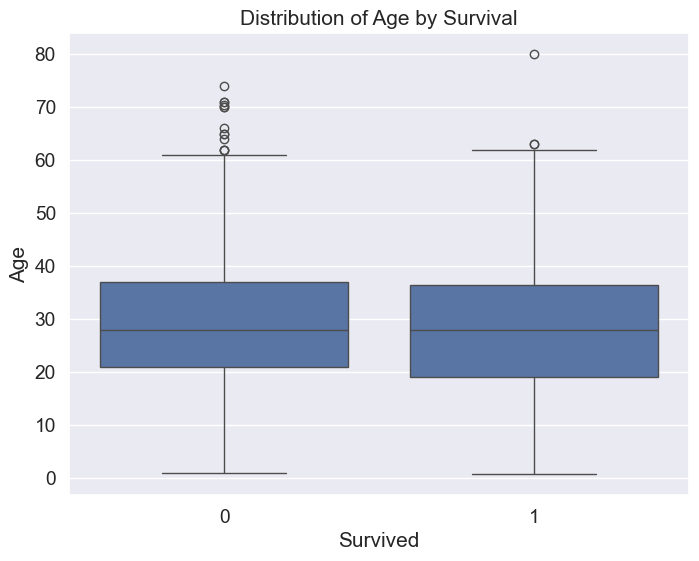

In [161]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Distribution of Age by Survival')
plt.show()


In [162]:
df_train.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,0.387870,2.315938,29.326643,0.538787,0.385049,33.547302
std,0.487609,0.834657,14.100166,1.146219,0.811187,52.912893
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.500000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
df_train.tail()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
106,1,3,male,29.0,0,0,7.7750
270,1,2,female,41.0,0,1,19.5000
860,0,2,male,24.0,0,0,13.0000
435,0,1,male,64.0,1,4,263.0000
102,0,3,male,33.0,0,0,8.6542


In [164]:
import category_encoders as ce

# Resetting indices for X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Example 1: Target Encoding
encoder_target = ce.TargetEncoder(cols=['Pclass', 'Sex'])
X_train_encoded_target = encoder_target.fit_transform(X_train, y_train)
X_test_encoded_target = encoder_target.transform(X_test)

# Example 2: CatBoost Encoding
encoder_catboost = ce.CatBoostEncoder(cols=['Pclass', 'Sex'])
X_train_encoded_catboost = encoder_catboost.fit_transform(X_train, y_train)
X_test_encoded_catboost = encoder_catboost.transform(X_test)

# Example 3: Binary Encoding
encoder_binary = ce.BinaryEncoder(cols=['Sex'])
X_train_encoded_binary = encoder_binary.fit_transform(X_train, y_train)
X_test_encoded_binary = encoder_binary.transform(X_test)

log_reg_model_target = LogisticRegression()
log_reg_model_target.fit(X_train_target, y_train)
y_pred_target = log_reg_model_target.predict(X_test_target)

# Evaluate model performance for Target Encoding
accuracy_target = accuracy_score(y_test, y_pred_target)
print("Model Accuracy with Target Encoding:", accuracy_target)
print("Classification Report with Target Encoding:")
print(classification_report(y_test, y_pred_target))



Model Accuracy with Target Encoding: 0.5955056179775281
Classification Report with Target Encoding:
              precision    recall  f1-score   support

           0       0.61      0.95      0.75       111
           1       0.00      0.00      0.00        67

    accuracy                           0.60       178
   macro avg       0.31      0.48      0.37       178
weighted avg       0.38      0.60      0.47       178



c:\Users\Me\Documents\GitHub\Workspace\.venv\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
c:\Users\Me\Documents\GitHub\Workspace\.venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Me\Documents\GitHub\Workspace\.venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Me\Documents\GitHub\Workspace\.venv\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will 